# Regression Assignment

I want you to practice some regression and analyzing your results.  Utilize this document to load data directly.

In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Fit goals vs points in a linear regression.  Fit a multiple regression on goals and assists vs points.  What do you notice about these two fits.
https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv

In [2]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

In [3]:
x = np.array(df[['G','A']])
y = np.array(df.PTS)

## Logistic Regression

Using the 538 Avengers dataset,https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv, fit a logistic regression to predict `Death1` (first time a character might die) based on whatever variables you find interesting.  Make a prediction using probabilities on your favorite character.

In [4]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


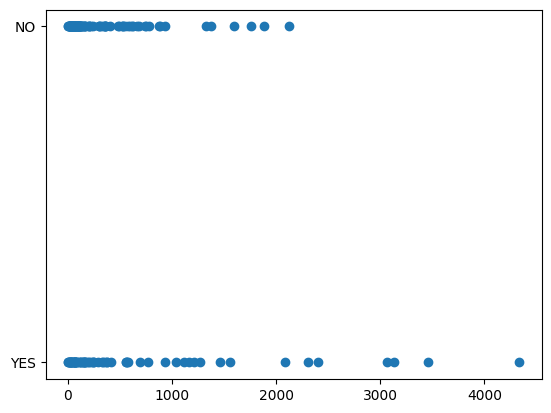

In [5]:
plt.scatter(df['Appearances'],df['Death1'])

## Find Your Own Regression

I have compiled olympic 100m dash records from a wikipedia page https://en.wikipedia.org/wiki/100_metres_at_the_Olympics.  Use this data and fit a regression of some type for prediciting `Time`.  Justify your model used in words and pictures. Predict the new Olympic Record for 2024 and 2300.  Describe in words the validity of your predictions.

In [6]:



df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
x = np.array(df)

df.head()

,Time,Athlete,Nation,Games,Round,Date,Gender
0,12.2,Francis Lane,United States (USA),1896,Heat 1,1896-04-06,Men
1,12.2,Thomas Curtis,United States (USA),1896,Heat 2,1896-04-06,Men
2,11.8,Tom Burke,United States (USA),1896,Heat 3,1896-04-06,Men
3,11.4,Arthur Duffey,United States (USA),1900,Heat 1,6/14/1900,Men
4,11.4,Walter Tewksbury,United States (USA),1900,Heat 2,6/14/1900,Men


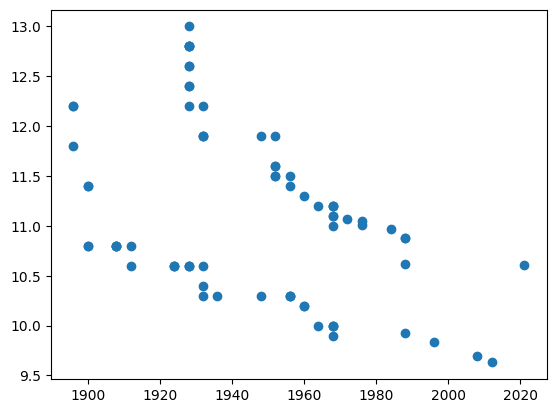

In [7]:
plt.scatter(df['Games'],df['Time'])

I am going to make some different fits.  First I'll try an exponontial by taking the log of the data.

In [10]:
y = np.array(df.Time.apply(lambda x: np.log(x)))

In [11]:
from scipy import stats

stats.linregress(df.Games,y)



LinregressResult(slope=-0.0011345957925618724, intercept=4.612591372868715, rvalue=-0.4375995947000386, pvalue=7.719100609180217e-05, stderr=0.0002710130358290135, intercept_stderr=0.527326341732445)

So if I am going to use this, I must remember to convert back.

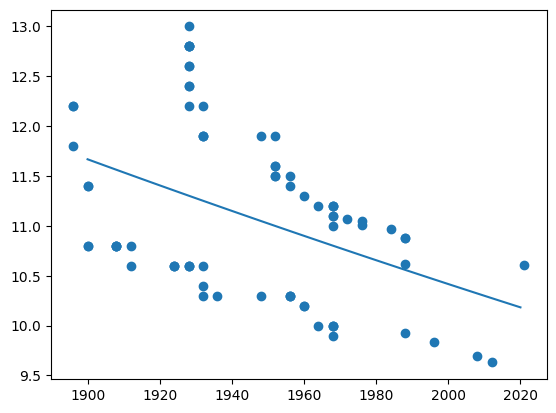

In [15]:
def predict(x):
  return np.exp(-0.001134595*x+4.6125913)

xs = np.linspace(1900,2020,100)
ys = predict(xs)

plt.plot(xs,ys)
plt.scatter(df.Games,df.Time)

That looks so linear...

Gonna try again...  This time with a reciprical function.

In [14]:
y = np.array(df.Time.apply(lambda x: 1/x))

stats.linregress(df.Games,y)

LinregressResult(slope=0.00010288037301139977, intercept=-0.10965094918657976, rvalue=0.44369556763005724, pvalue=5.957763993495266e-05, stderr=2.4156035084702813e-05, intercept_stderr=0.04700184835394268)

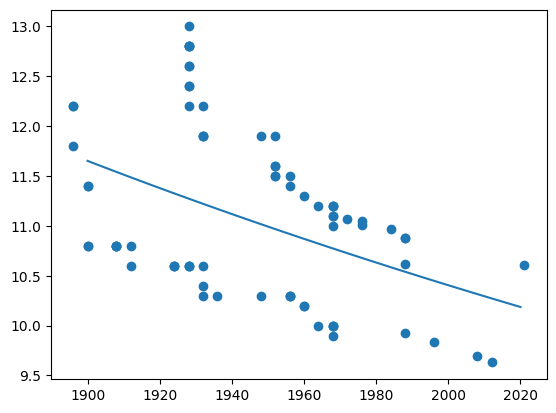

In [16]:
def predict(x):
  return 1/(0.00010288037*x-0.1096509491)

xs = np.linspace(1900,2020,100)
ys = predict(xs)

plt.plot(xs,ys)
plt.scatter(df.Games,df.Time)

Well dang...